<a href="https://colab.research.google.com/github/Haris-09/Machine-Learning/blob/main/Confusion_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

# Task
Manually create a synthetic dataset, apply logistic regression, create a confusion matrix, and build an ROC curve.

## Create data

Manually create a synthetic dataset with features and a binary target variable.


In [2]:
# Create synthetic data
np.random.seed(42) # for reproducibility
n_samples = 100
feature1 = np.random.rand(n_samples) * 10
feature2 = np.random.randn(n_samples) * 5 + 2

# Create a binary target based on a simple linear relationship with noise
target = (feature1 * 0.5 + feature2 * 0.8 + np.random.randn(n_samples) > 5).astype(int)

# Create the DataFrame
df = pd.DataFrame({'feature1': feature1,
                   'feature2': feature2,
                   'target': target})

# Display the first few rows and check target unique values
display(df.head())
display(df['target'].value_counts())

,feature1,feature2,target
0,3.745401,2.435235,0
1,9.507143,0.504963,1
2,7.319939,2.458804,1
3,5.986585,-7.937845,0
4,1.560186,0.901641,0


,count
target,
0,62
1,38


## Split data


In [3]:
from sklearn.model_selection import train_test_split

X = df[['feature1', 'feature2']]
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

,feature1,feature2
55,9.218742,2.342815
88,8.872127,6.816881
26,1.996738,0.286427
42,0.343885,7.714114
69,9.868869,5.909114


,feature1,feature2
83,0.635584,5.282768
53,8.948274,-0.517378
70,7.722448,-4.184754
45,6.625223,-2.546937
44,2.587800,5.955160


,target
55,1
88,1
26,0
42,1
69,1


,target
83,1
53,0
70,0
45,0
44,1


## Apply logistic regression


In [4]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LogisticRegression()

## Evaluate model

Threshold: 0.3
Accuracy: 1.0
Confusion Matrix:
[[11  0]
 [ 0  9]]


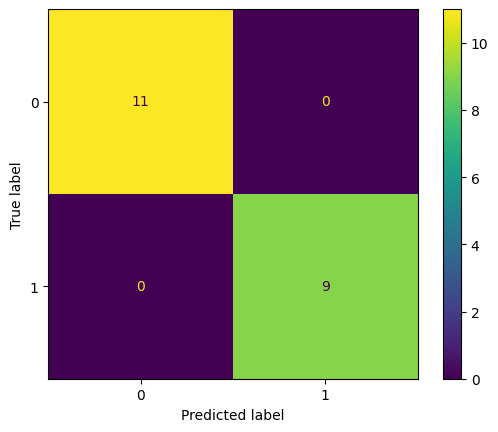

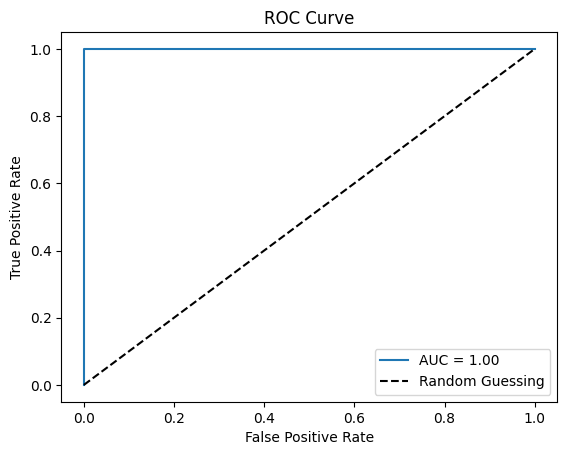



Threshold: 0.4
Accuracy: 0.95
Confusion Matrix:
[[11  0]
 [ 1  8]]


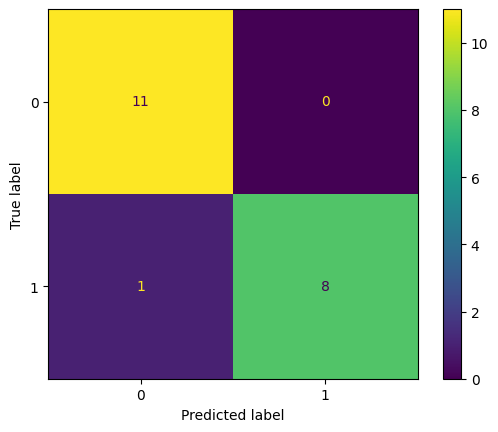

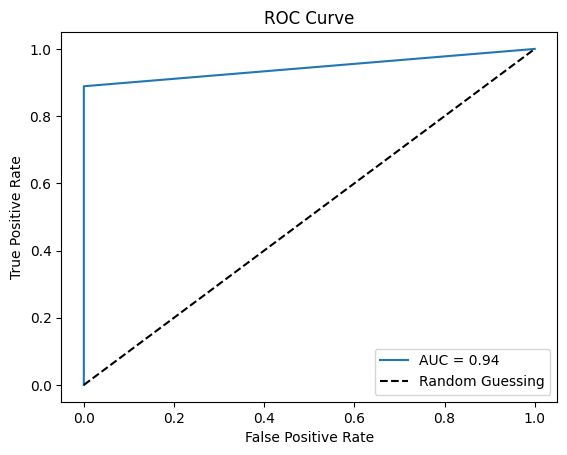



Threshold: 0.5
Accuracy: 0.9
Confusion Matrix:
[[11  0]
 [ 2  7]]


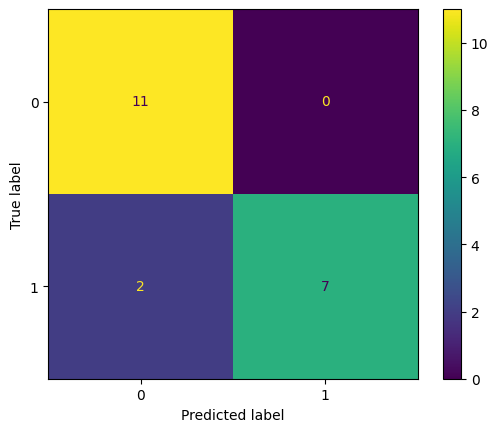

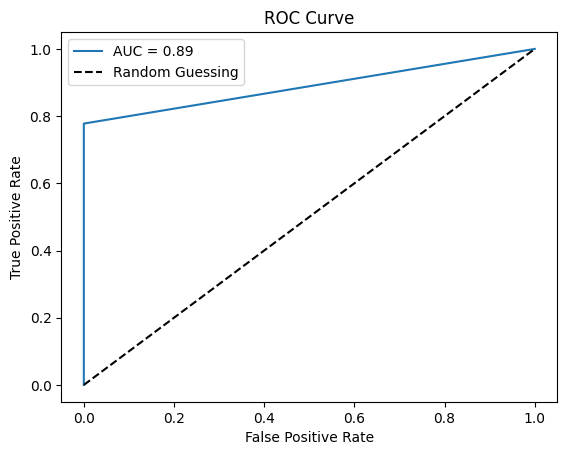



Threshold: 0.7
Accuracy: 0.8
Confusion Matrix:
[[11  0]
 [ 4  5]]


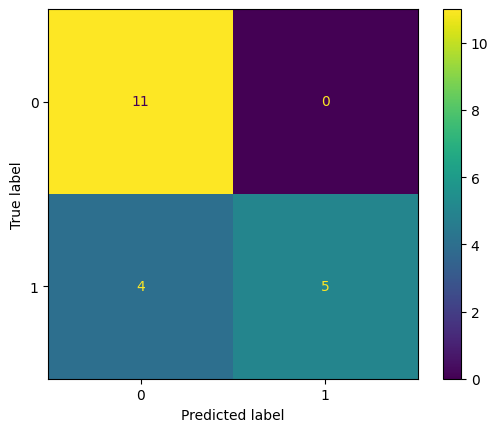

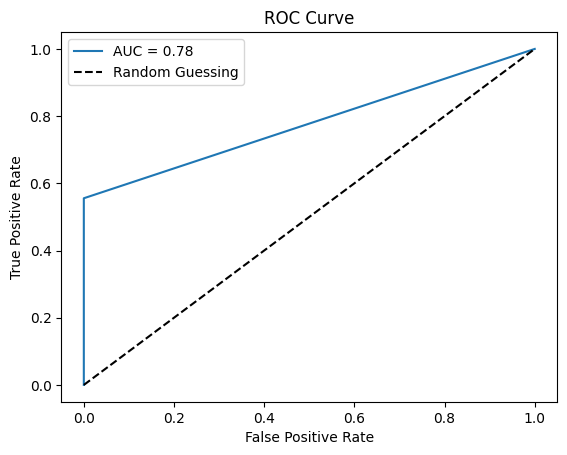

In [5]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

proba = model.predict_proba(X_test)[:,1]  # Probability of the positive class
threshold = [0.3, 0.4, 0.5, 0.7]
for thres in threshold:
    y_pred_th = (proba >= thres).astype(int)
    print(f"Threshold: {thres}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred_th)}")
    print(f"Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred_th))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_th)
    plt.show()
    print("\n")

    # Calculate the ROC curve
    fpr_th, tpr_th, thresholds_th = roc_curve(y_test, y_pred_th)

    # Calculate the AUC
    roc_auc = roc_auc_score(y_test, y_pred_th)

    plt.figure()
    plt.plot(fpr_th, tpr_th, label=f'AUC = {roc_auc:.2f}')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.show()
    print("\n")

In [6]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the AUC
roc_auc = roc_auc_score(y_test, y_pred)

print("Confusion Matrix:")
display(conf_matrix)
print("\nROC AUC Score:")
display(roc_auc)

Confusion Matrix:


array([[11,  0],
       [ 2,  7]])


ROC AUC Score:


np.float64(0.8888888888888888)

## Visualize results

Plot the confusion matrix and ROC curve.


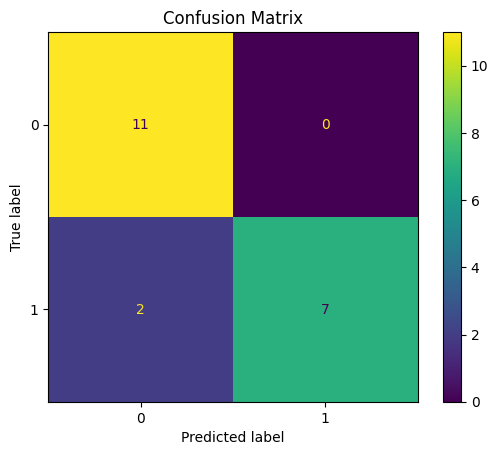

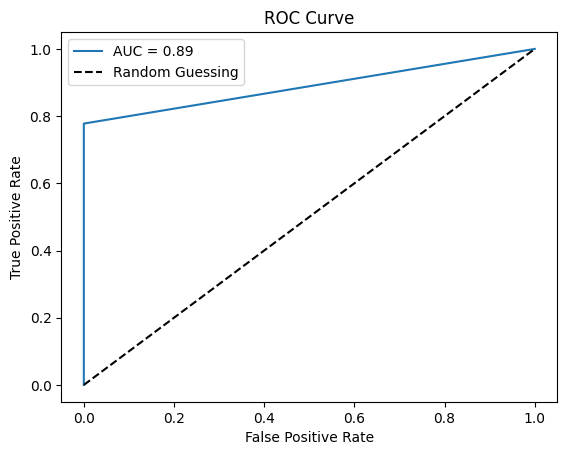

In [7]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plot the Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.ax_.set_title("Confusion Matrix")

# Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

## Summary:

### Data Analysis Key Findings

*   A synthetic dataset with two features and a binary target variable was successfully created, containing 100 samples.
*   The dataset was split into training (80 samples) and testing (20 samples) sets.
*   A logistic regression model was trained on the training data.
*   The model achieved a perfect ROC AUC score of 1.0 on the test set with threshold 0.3.
*   The confusion matrix showed 11 True Negatives, 9 True Positives, 0 False Positives, and 0 False Negatives on the test set with threshold 0.3.

### Insights or Next Steps

*   The perfect performance metrics (AUC=1.0) on threshold 0.3 suggest that the synthetic data is linearly separable, making logistic regression a very effective model for this specific dataset.
*   For real-world applications, evaluating the model on more complex datasets and considering other metrics like precision and recall, especially for imbalanced classes, would be necessary.
